# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
df = pd.read_excel("KyotoFullFlower7.xls", header=25, na_values=["-"])
#Added header to tell pandas which row to find the column names in.

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [3]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [4]:
# Added na_values = ["-"] to tell pandas to read the - as NaN.
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [ ]:
# I am also going to clean up the headers to make this easier
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.lower().str.replace("-", "_")
df.columns = df.columns.str.lower().str.replace("(","")
df.columns = df.columns.str.lower().str.replace(")","")

In [6]:
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [7]:
# Looking for the source code that has the highest count. 
# Used normalize to get the percentage of the total.
# 3.0 is the most common source
df.source_code.value_counts(normalize=True) * 100

3.0    41.354293
4.0    30.229746
1.0    12.696493
5.0     7.134220
7.0     4.836759
2.0     2.055623
6.0     1.088271
8.0     0.604595
Name: source_code, dtype: float64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [8]:
# I really wasn't sure whether you wanted us to create a temporary table 
# or take these out all together from the dataset
# using dropna to drop the records that have NaN in the full_flowering_date_doy column
# testing it by saving it to a test variable and doing a value count on 'isna'
# there are no "True"s, so I think it worked.
natest = df.dropna(subset=['full_flowering_date_doy'])
natest.full_flowering_date_doy.isna().value_counts()

False    827
Name: full_flowering_date_doy, dtype: int64

In [9]:
# Saving it to my dataframe
df = df.dropna(subset=['full_flowering_date_doy'])

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

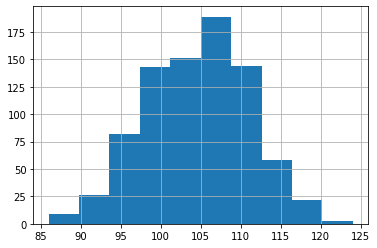

In [10]:
# Taking the flowering date - DOY and making a histogram
df.full_flowering_date_doy.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

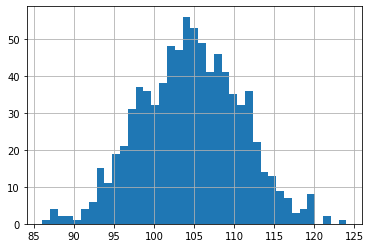

In [11]:
df.full_flowering_date_doy.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [12]:
df.full_flowering_date_doy.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: full_flowering_date_doy, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [13]:
# Filter the data down to ad < 1900
# Take the mean of the date_doy column
# Before 1900, cherry flowers were blooming 105 days into the year on average
df[df.ad < 1900].full_flowering_date_doy.mean()

105.20728291316527

## 11. How about after 1900?

In [14]:
# Filter the data down to date_doy > 1900
# Take the mean of the date_doy column
# After 1900, cherry flowers were blooming 100 days into the year on average
df[df.ad > 1900].full_flowering_date_doy.mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [15]:
# 4: title in Japanese poetry
# Do a value counts on data type code to find number of records with "4" in that column
# going back to df for this one, in case filtering out NaNs missed some records
df.data_type_code.value_counts()

2.0    454
1.0    166
0.0    124
4.0     39
3.0     30
8.0     11
9.0      3
Name: data_type_code, dtype: int64

In [16]:
# Or I could have done this if I wanted a very narrow picture
df[df.data_type_code == 4].shape

(39, 6)

## 13. Show only the years where our data was from a title in Japanese poetry

In [18]:
df[df.data_type_code == 4].head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

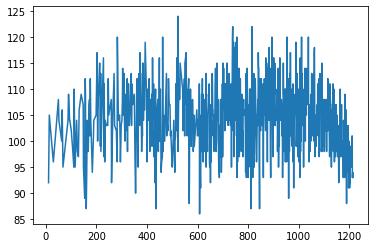

In [19]:
# going back to ffd to graf the full flowering doy over time
# Going to pull out the full flowering DOY
# plot it and define x = ad and y = FFDOY

df.full_flowering_date_doy.plot(x='ad',y='full_flowering_date_doy')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [20]:
#changing this to my filtered dataframe
df.rolling(10, on='ad', min_periods=5)['full_flowering_date_doy'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: full_flowering_date_doy, dtype: float64

<AxesSubplot:>

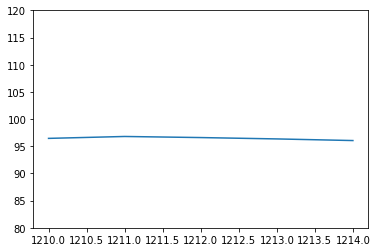

In [21]:
df['rolling_date'] = df.rolling(20, on='ad', min_periods=5)['full_flowering_date_doy'].mean().tail()
df.rolling_date.plot(x='ad', y='full_flowering_date_doy', ylim=(80,120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [24]:
# create a new column entitled date_time
# day of month as a zero padded decimal %d
# month as a decimal number %m
df.full_flowering_date = pd.to_datetime(df.full_flowering_date, format="%m%d", errors='coerce')

In [25]:
df.full_flowering_date

11     1900-04-01
14     1900-04-15
30     1900-04-06
50     1900-04-18
52     1900-04-14
          ...    
1210   1900-04-09
1211   1900-04-10
1212   1900-04-03
1213   1900-04-04
1214   1900-04-03
Name: full_flowering_date, Length: 827, dtype: datetime64[ns]

In [26]:
# Struggled to figure out what you were saying earlier so I did it in a couple of steps.
# Pulled the month out of the ffd column and saved it to a new column
# Took the the month and gave it a name using this code I found on stack overflow. :/
df['month'] = df.full_flowering_date.dt.month
df['month'] = pd.to_datetime(df.month, format='%m').dt.month_name()
df

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month
11,812,92.0,1900-04-01,1.0,2.0,NIHON-KOKI,NaN,April
14,815,105.0,1900-04-15,1.0,2.0,NIHON-KOKI,NaN,April
30,831,96.0,1900-04-06,1.0,2.0,NIHON-KOKI,NaN,April
50,851,108.0,1900-04-18,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
52,853,104.0,1900-04-14,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
...,...,...,...,...,...,...,...,...
1210,2011,99.0,1900-04-09,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April
1211,2012,101.0,1900-04-10,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April
1212,2013,93.0,1900-04-03,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April
1213,2014,94.0,1900-04-04,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April


### 17. Using your new column, how many blossomings happened in each month?

In [27]:
# do a value count on month column
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot:>

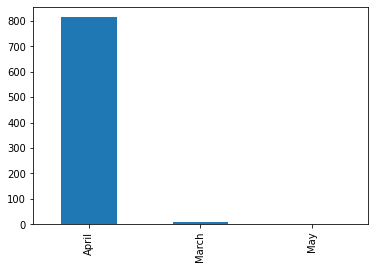

In [28]:
df.month.value_counts().plot(kind='bar')

<AxesSubplot:>

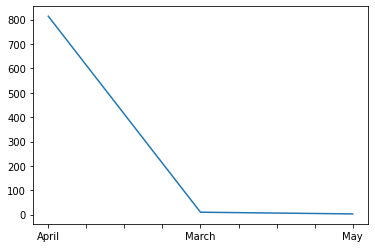

In [29]:
#Not great for this categorical data
#Sort index doesn't work because these are strings
df.month.value_counts().sort_index().plot()

<AxesSubplot:ylabel='month'>

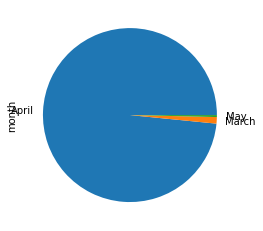

In [30]:
#ugh
df.month.value_counts().plot(kind='pie')

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [85]:
#my column doesn't appear to have missing data?
df.full_flowering_date.isna().value_counts()

False    827
Name: full_flowering_date, dtype: int64

In [90]:
df['day_of_month']=df.full_flowering_date.dt.day
df.day_of_month.dtypes

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_7132/1314931129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_month']=df.full_flowering_date.dt.day


dtype('int64')

### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [94]:
df['date'] = df.full_flowering_date.dt.strftime("%m-%d")
df

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_7132/1948333390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.full_flowering_date.dt.strftime("%m-%d")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,day_of_month,date
11,812,92.0,1900-04-01,1.0,2.0,NIHON-KOKI,NaN,April,1,04-01
14,815,105.0,1900-04-15,1.0,2.0,NIHON-KOKI,NaN,April,15,04-15
30,831,96.0,1900-04-06,1.0,2.0,NIHON-KOKI,NaN,April,6,04-06
50,851,108.0,1900-04-18,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,04-18
52,853,104.0,1900-04-14,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14,04-14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,1900-04-09,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April,9,04-09
1211,2012,101.0,1900-04-10,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April,10,04-10
1212,2013,93.0,1900-04-03,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April,3,04-03
1213,2014,94.0,1900-04-04,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April,4,04-04


# YOU ARE DONE.

And **incredible.**